In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data=pd.read_csv('/content/Wholesale customers data.csv')

In [14]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [15]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [17]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [18]:
x = data[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']]

In [19]:
x

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [20]:
#KMEAN CLUSTERING
from sklearn.cluster import KMeans

In [21]:
wcss = []
for i in range (1,10):
  km = KMeans(n_clusters=i,n_init=15)
  km.fit(x)
  css = km.inertia_
  wcss.append(css)

In [22]:
wcss

[157595857165.60907,
 113217528520.90988,
 80342166920.94073,
 64855545528.211044,
 53056232068.75723,
 46661054042.06636,
 41316692878.20761,
 36138398611.6377,
 32813785151.97294]

Text(0.5, 0, 'Number of Clusters')

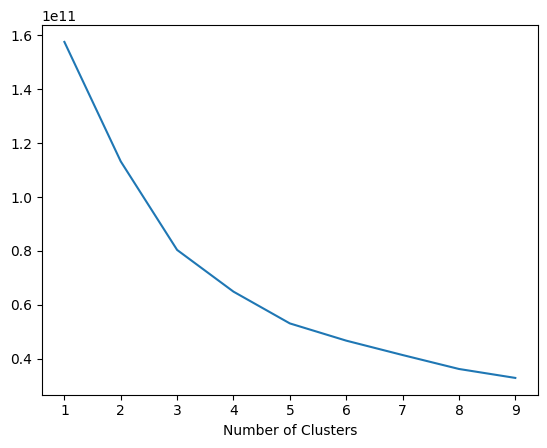

In [24]:
plt.plot(range(1,10),wcss)
plt.xlabel("Number of Clusters")

In [25]:
km = KMeans(n_clusters=5, n_init=15)

In [26]:
km.fit(x)

KMeans(n_clusters=5, n_init=15)

In [27]:
cluster_labels = km.predict(x)

In [28]:
cluster_labels

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 1, 2, 2, 2, 1, 4, 1, 2, 1, 2, 1,
       2, 4, 2, 2, 1, 1, 4, 2, 2, 1, 2, 2, 1, 1, 2, 4, 4, 0, 2, 2, 4, 4,
       1, 4, 4, 3, 1, 4, 1, 1, 2, 4, 2, 1, 4, 4, 1, 1, 1, 3, 1, 4, 1, 4,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 4, 1, 1, 1, 4, 1, 2, 1, 3, 3, 0,
       1, 2, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 4, 4, 1, 0, 1, 2, 1, 4, 1, 4,
       1, 4, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0, 2, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 4, 1, 1, 1, 2, 2, 1, 2, 1,
       1, 4, 4, 2, 1, 4, 1, 1, 2, 4, 1, 4, 1, 1, 1, 1, 4, 4, 1, 4, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 4, 2, 1, 1, 4, 1, 2, 2, 1,
       1, 1, 4, 4, 2, 1, 1, 4, 1, 1, 1, 4, 2, 4, 1, 1, 1, 4, 4, 2, 4, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 0, 2, 2,
       2, 1, 1, 4, 1, 1, 2, 1, 1, 4, 1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 2, 1,
       4, 4, 4, 2, 4, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2,
       1, 2, 2, 2, 1, 1, 1, 4, 2, 1, 2, 1, 1, 1, 2,

In [29]:
pd.Series(cluster_labels).value_counts()

1    240
2    108
4     74
0     13
3      5
dtype: int64

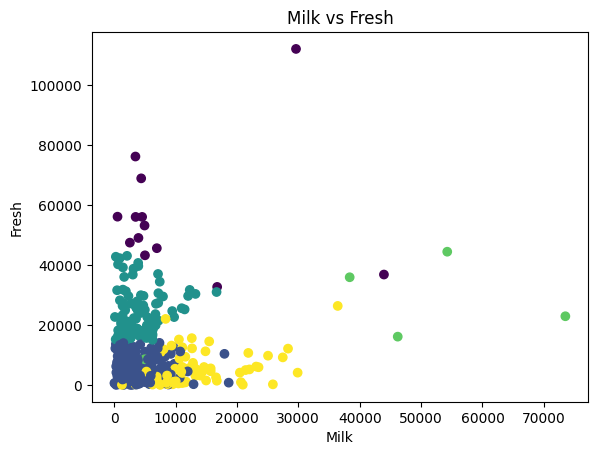

In [30]:
plt.scatter(x['Milk'], x['Fresh'], c = cluster_labels)
plt.xlabel('Milk')
plt.ylabel('Fresh')
plt.title('Milk vs Fresh')
plt.show()

In [31]:
cluster_indices = np.where(cluster_labels ==0)[0]

In [32]:
cluster_indices

array([ 39,  87, 103, 125, 176, 181, 183, 239, 258, 259, 282, 284, 325])

In [33]:
#PCA
from sklearn.decomposition import PCA

In [36]:
pca=PCA(n_components=2)

reduced_x=pd.DataFrame(data=pca.fit_transform(x),columns=['PCA1','PCA2'])

In [37]:
reduced_x.head()

,PCA1,PCA2
0,650.022122,1585.519090
1,-4426.804979,4042.451509
2,-4841.998707,2578.762176
3,990.346437,-6279.805997
4,10657.998731,-2159.725815


In [40]:
centers=pca.transform(km.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [41]:
centers

array([[46263.38277636, -2636.84073255],
       [-6290.59959971, -3901.07118527],
       [10995.21234536, -5111.03352849],
       [20964.64986166, 68819.21772923],
       [-5189.00344283, 15924.75062727]])

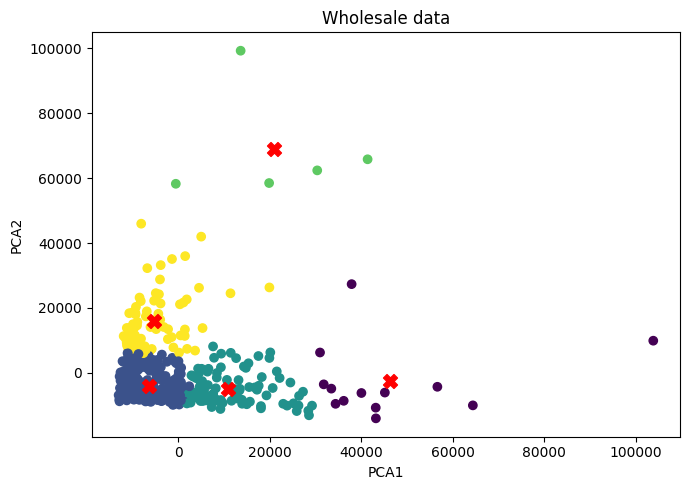

In [42]:
plt.figure(figsize=(7,5))

# Scatter plot
plt.scatter(reduced_x['PCA1'],reduced_x['PCA2'],c=km.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='X',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wholesale data')
plt.tight_layout()

In [43]:
#Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [44]:
mergings = linkage(x,method="centroid")

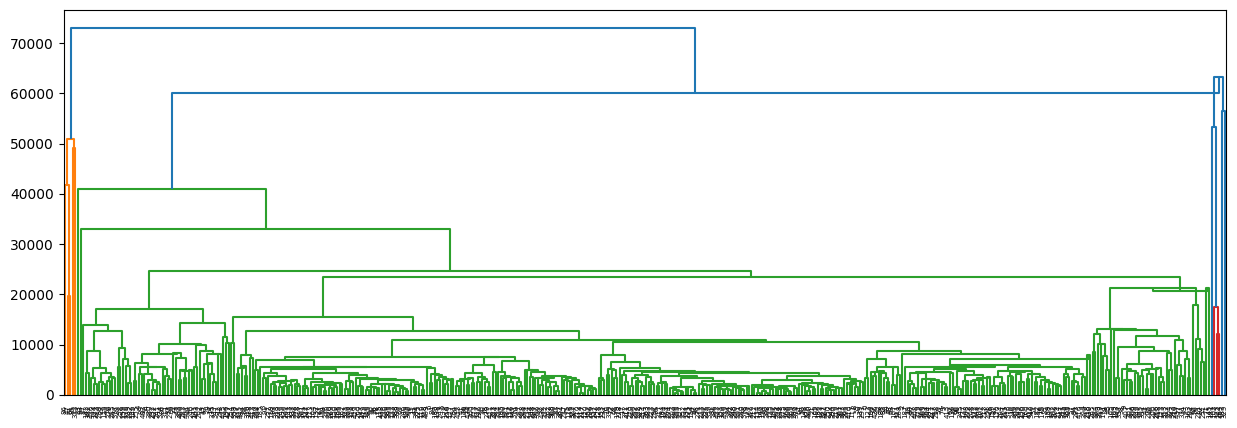

In [45]:
plt.figure(figsize=(15,5))
dendrogram(mergings)
plt.show()

In [47]:
#It is very difficult to find the clusters by "Hierarchical clustering"